# Tarea 2
- Arroyo Rivera Juan José
- Merino Peña Kevin Ariel
- Brito Juárez Britny
- Pedro Mendez José Manuel
- Preciado Márquez David Salvador


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1

1. Usando K-Means y el datset datasetblow.csv (proporcionado junto con la tarea)


In [ ]:
# Dataset download
!wget http://merino.codes/datablow.csv

--2023-05-08 01:07:55--  http://merino.codes/datablow.csv
Resolving merino.codes (merino.codes)... 20.213.161.121
Connecting to merino.codes (merino.codes)|20.213.161.121|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42533 (42K) [application/octet-stream]
Saving to: ‘datablow.csv’

datablow.csv        100%[===================>]  41.54K   275KB/s    in 0.2s    

2023-05-08 01:07:55 (275 KB/s) - ‘datablow.csv’ saved [42533/42533]



a) Para $k = 2, \dots, 16.$ Calcula el WCSS para cada $k$ y grafica los WCSS de cada $k$ en una gráfica de líneas (revisa la referencia)
$$ WCSS = \sum_i \bigg( ∑_{P_j \in \text{Cluster}_i}  \delta(P_j, C_i)^2 \bigg)  $$
donde $\delta$ representa la distancia


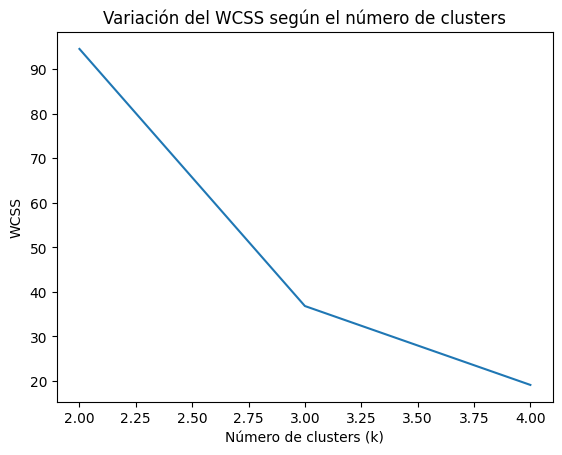

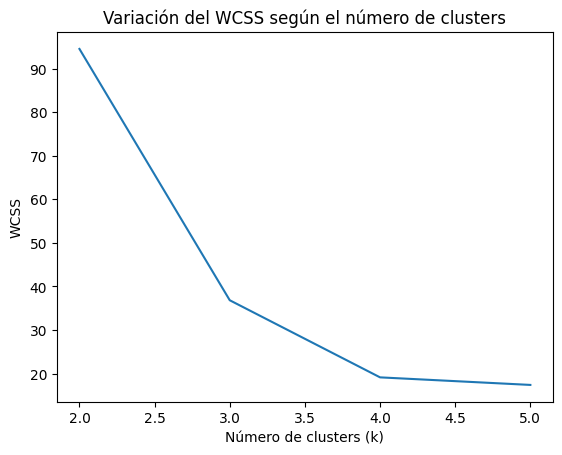

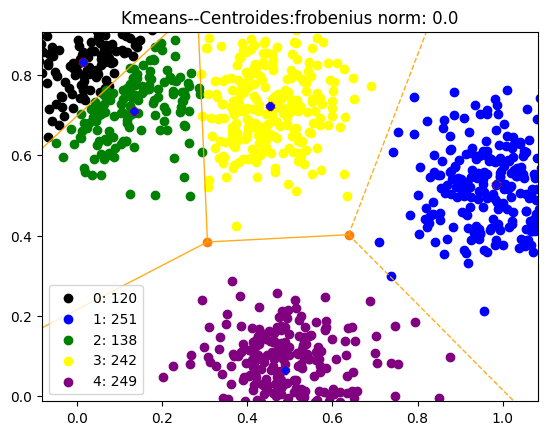

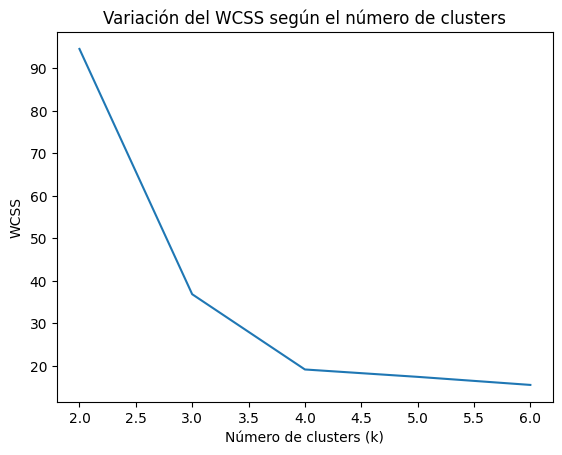

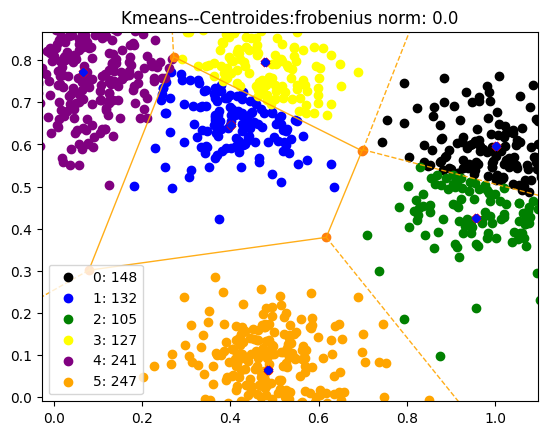

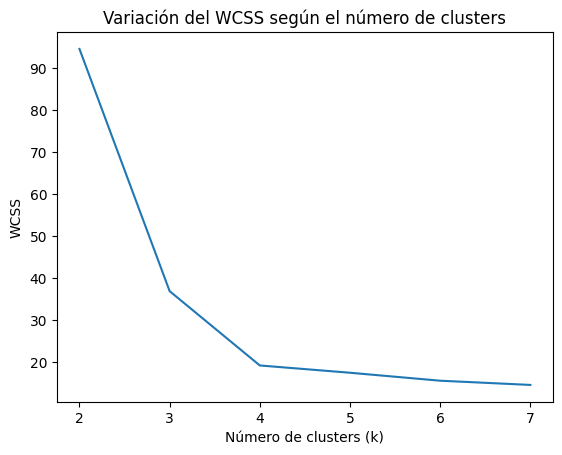

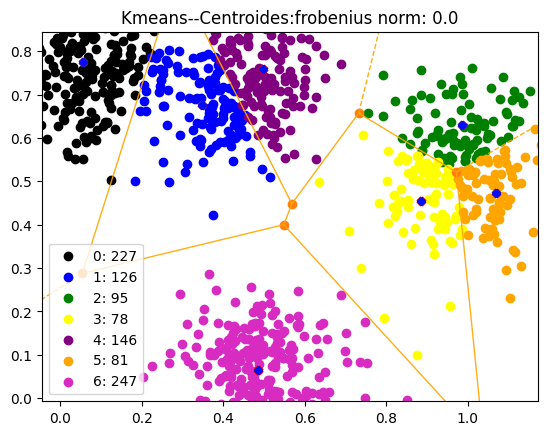

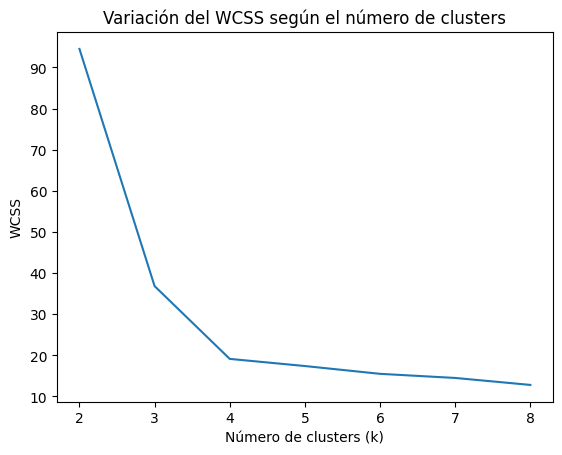

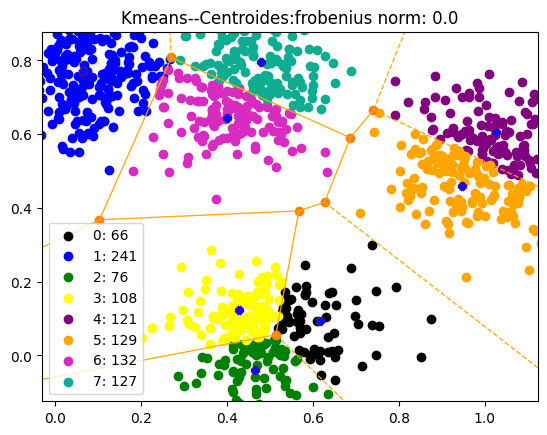

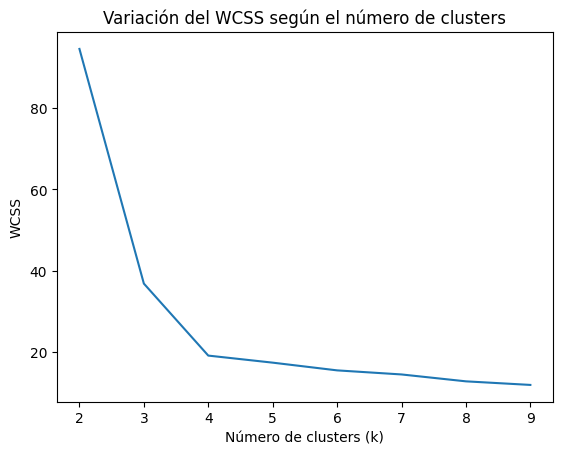

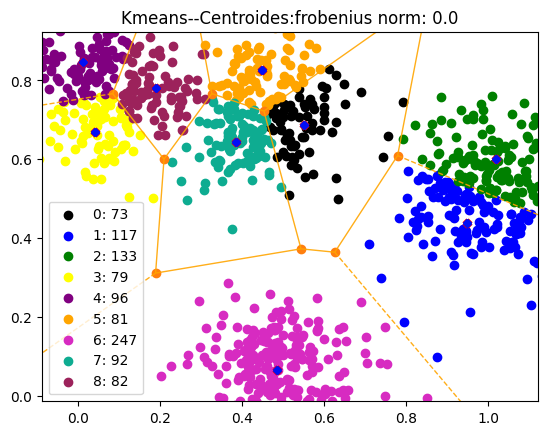

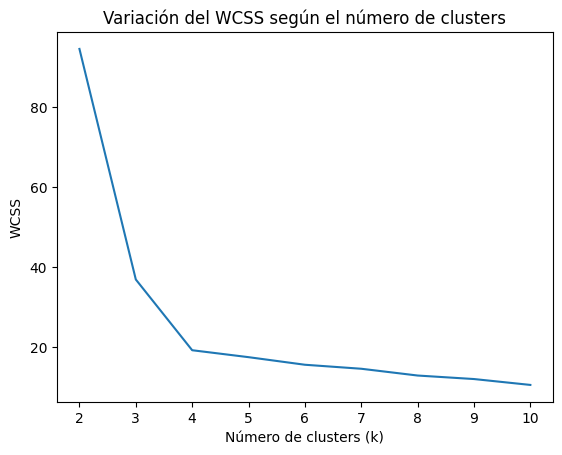

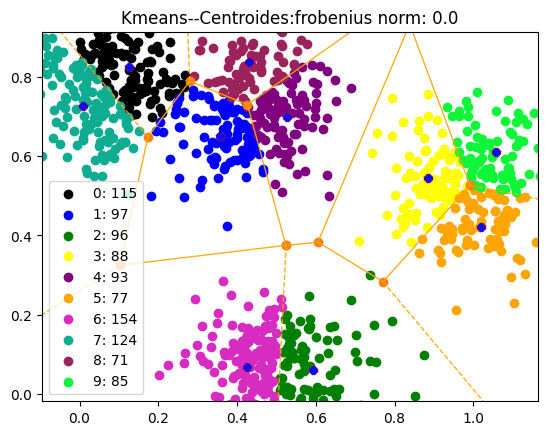

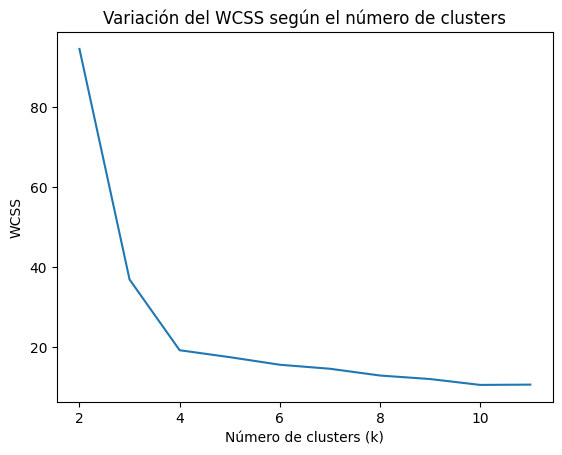

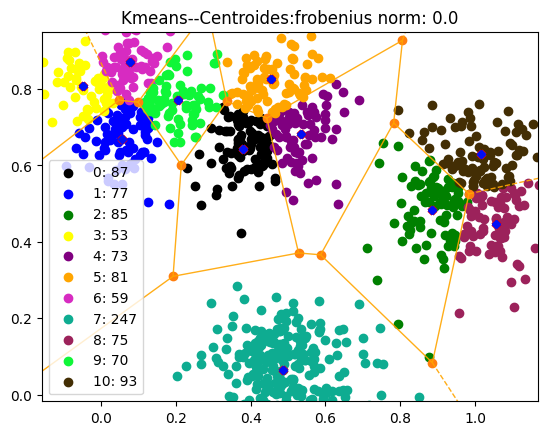

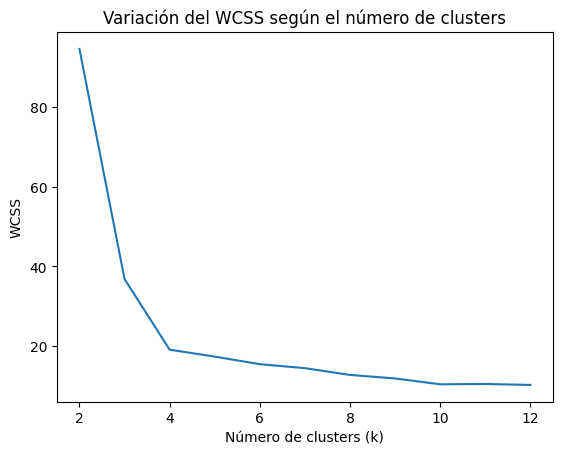

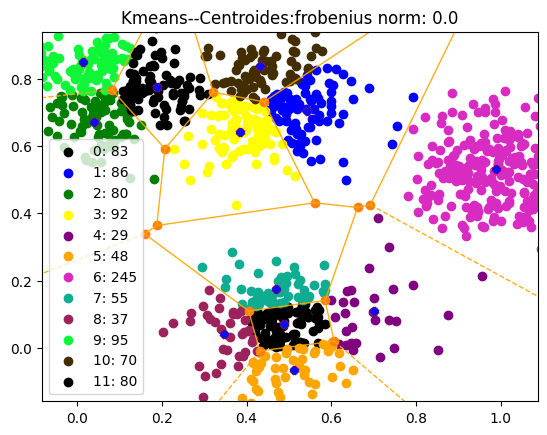

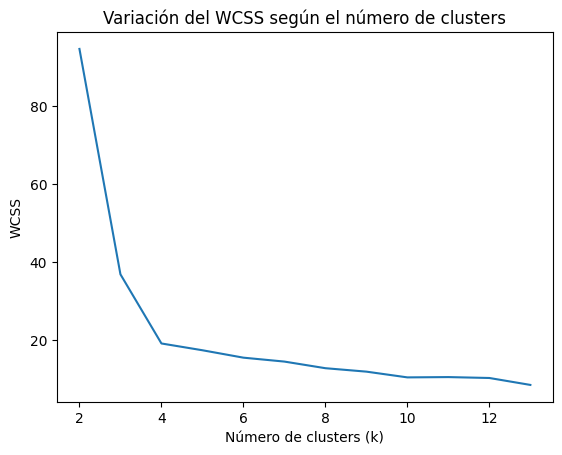

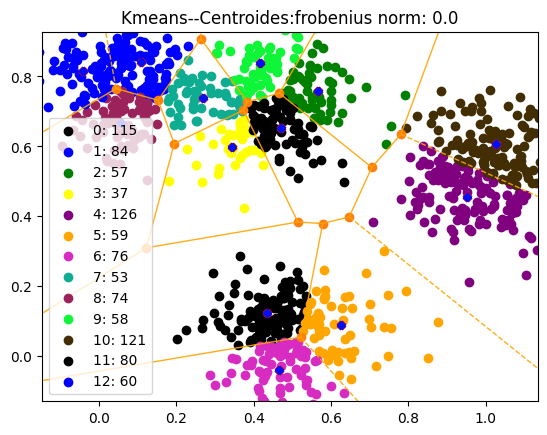

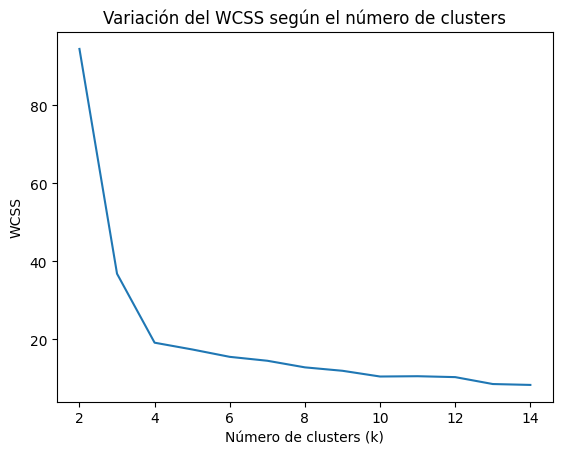

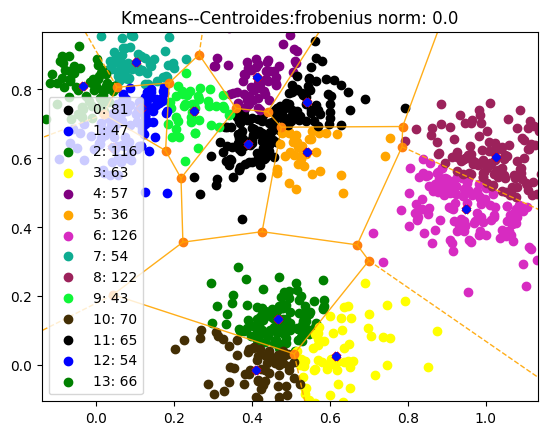

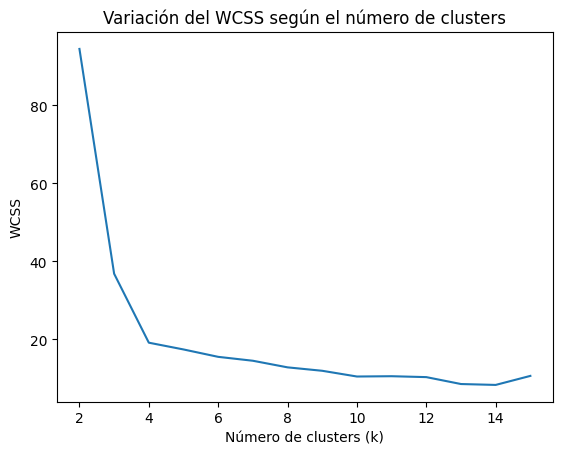

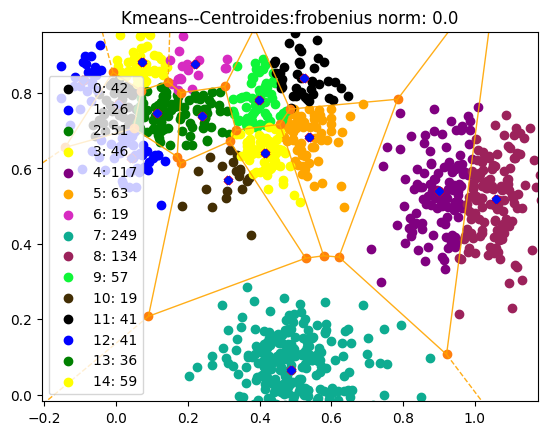

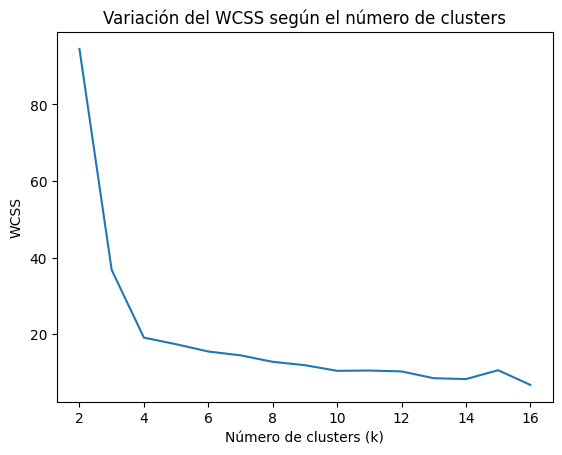

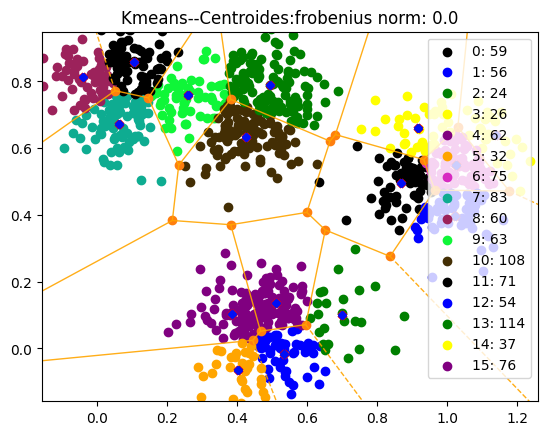

In [ ]:
import numpy as np
from collections import  Counter
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

points  = np.loadtxt('datablow.csv', delimiter=',', skiprows=1, usecols=[1,2])

# Función para calcular la distancia euclidiana
def euclidean_distance(point, centroid):
  return np.sqrt(np.sum((point - centroid)**2))

wcss = [] # Arreglo que contendra la lista de

for k in range(2, 17):
    # Asignar el número de clusters
    num_clusters = k
    # Inicializar los centroides
    centroids = points[np.random.choice(points.shape[0], k, replace=False), :]

    # Inicializar los indices de los puntos para cada cluster
    cluster_indices = np.zeros(points.shape[0])
    cluster_indices_prev = np.zeros(points.shape[0])
    # Bucle hasta que los puntos dejen de cambiar de cluster.
    converged = False
    frobenius_norm_valores = []

    while not converged:
        # Inicializar los puntos asignados a cada cluster.
        cluster_points= [[] for i in range(k)]

        # Asignar cada punto a un cluster
        for i, point in enumerate(points):
            min_distance = float("inf")
            for j, centroid in enumerate(centroids):
                distance = euclidean_distance(point, centroid)
                if distance < min_distance:
                    cluster_indices[i] = j
                    min_distance = distance
            cluster_points[int(cluster_indices[i])].append(point)

        cent_copy = centroids.copy()
        resp = centroids.copy()

        # Calcular los nuevos centroides
        for i in range(k):
            centroids[i] = np.mean(cluster_points[i], axis=0)

        # Verificar si los puntos dejaron de cambiar de cluster usando frobenius_norm
        frobenius_norm = np.linalg.norm(cent_copy-np.array(centroids))
        frobenius_norm_valores.append(frobenius_norm)

        if np.array_equal(cluster_indices,cluster_indices_prev):
          converged = True
          # Calcular el WCSS para este valor de k
          wcss_k = 0
          for i in range(k):
              cluster_points_aux = cluster_points[i]
              centroid = centroids[i]
              for point in cluster_points_aux:
                  wcss_k += (euclidean_distance(point, centroid)**2)
          wcss.append(wcss_k)
          if len(wcss)>2:
            x_aux  = np.array(range(0,len(wcss)))+2
            #plt.plot(range(16  , 17), wcss, '-o')
            plt.plot(x_aux, wcss) # '-o'
            plt.xlabel('Número de clusters (k)')
            plt.ylabel('WCSS')
            plt.title('Variación del WCSS según el número de clusters')
            plt.show()
          if len(cent_copy)>4:
            #Creamos el Diagrama De Voronoid.
            vor = Voronoi(cent_copy)
            fig = voronoi_plot_2d(vor,show_vertices=True, line_colors='orange',
                                  line_width=1, line_alpha=.9, point_size=0)
            # Graficar los puntos y los centroides
            colors = ['black', 'blue', 'green', 'yellow', 'purple', 'orange','#D72BC1','#0EAC91','#9C225B','#0FF638','#432E04']
            for i, cluster_points_var in enumerate(cluster_points):
                x = [point[0] for point in cluster_points_var]
                y = [point[1] for point in cluster_points_var]
                cont_lab = len(cluster_points_var)
                plt.scatter(x, y, c=colors[i % len(colors)], label=f'{i}: {cont_lab}' )
            #Centroides Anteriores
            plt.scatter(cent_copy[:, 0], cent_copy[:, 1], marker='x', s=20, linewidth=4, color='#F70000') # el rojo
            #Centroides Guardados
            plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidth=4, color='#000FF7') # se mueve al azul
            #Titulo
            plt.title(f'Kmeans--Centroides:frobenius norm: {frobenius_norm}')
            plt.legend()
            fig.dpi=100
            plt.show()

        else:
          cluster_indices_prev = cluster_indices.copy()

In [ ]:
WCSS = 0
for ind, cent_aux in enumerate(centroids):
  for p_in in cluster_points[ind]:
    WCSS += euclidean_distance(p_in,cent_aux)**2
print(WCSS)

6.768274368560123


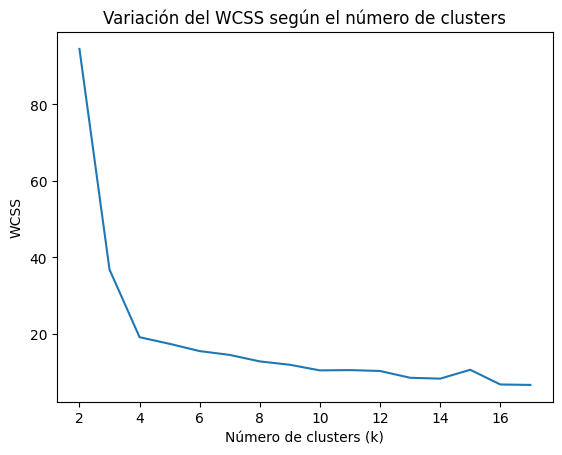

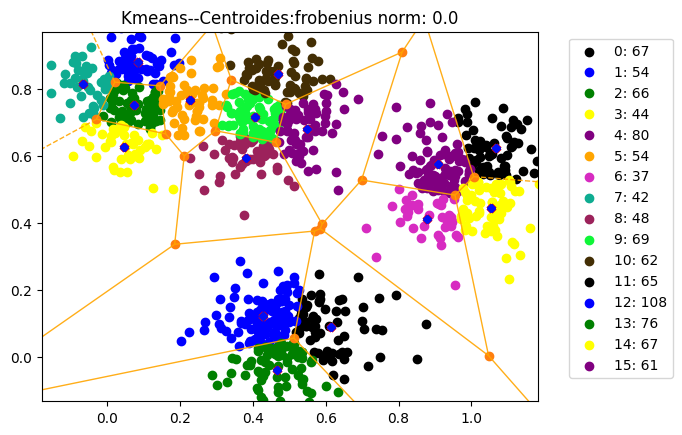

In [ ]:
# Asignar el número de clusters
num_clusters = 7
# Inicializar los centroides
centroids = points[np.random.choice(points.shape[0], k, replace=False), :]

# Inicializar los indices de los puntos para cada cluster
cluster_indices = np.zeros(points.shape[0])
cluster_indices_prev = np.zeros(points.shape[0])
# Bucle hasta que los puntos dejen de cambiar de cluster.
converged = False
frobenius_norm_valores = []

while not converged:
    # Inicializar los puntos asignados a cada cluster.
    cluster_points= [[] for i in range(k)]

    # Asignar cada punto a un cluster
    for i, point in enumerate(points):
        min_distance = float("inf")
        for j, centroid in enumerate(centroids):
            distance = euclidean_distance(point, centroid)
            if distance < min_distance:
                cluster_indices[i] = j
                min_distance = distance
        cluster_points[int(cluster_indices[i])].append(point)

    cent_copy = centroids.copy()
    resp = centroids.copy()

    # Calcular los nuevos centroides
    for i in range(k):
        centroids[i] = np.mean(cluster_points[i], axis=0)

    # Verificar si los puntos dejaron de cambiar de cluster usando frobenius_norm
    frobenius_norm = np.linalg.norm(cent_copy-np.array(centroids))
    frobenius_norm_valores.append(frobenius_norm)

    if np.array_equal(cluster_indices,cluster_indices_prev):
      converged = True
      # Calcular el WCSS para este valor de k
      wcss_k = 0
      for i in range(k):
          cluster_points_aux = cluster_points[i]
          centroid = centroids[i]
          for point in cluster_points_aux:
              wcss_k += (euclidean_distance(point, centroid)**2)
      wcss.append(wcss_k)
      if len(wcss)>2:
        x_aux  = np.array(range(0,len(wcss)))+2
        #plt.plot(range(16  , 17), wcss, '-o')
        plt.plot(x_aux, wcss) # '-o'
        plt.xlabel('Número de clusters (k)')
        plt.ylabel('WCSS')
        plt.title('Variación del WCSS según el número de clusters')
        plt.show()
      if True:
        #Creamos el Diagrama De Voronoid.
        vor = Voronoi(cent_copy)
        fig = voronoi_plot_2d(vor,show_vertices=True, line_colors='orange',
                              line_width=1, line_alpha=.9, point_size=0)
        # Graficar los puntos y los centroides
        colors = ['black', 'blue', 'green', 'yellow', 'purple', 'orange','#D72BC1','#0EAC91','#9C225B','#0FF638','#432E04']
        for i, cluster_points_var in enumerate(cluster_points):
            x = [point[0] for point in cluster_points_var]
            y = [point[1] for point in cluster_points_var]
            cont_lab = len(cluster_points_var)
            plt.scatter(x, y, c=colors[i % len(colors)], label=f'{i}: {cont_lab}' )
        #Centroides Anteriores
        plt.scatter(cent_copy[:, 0], cent_copy[:, 1], marker='x', s=20, linewidth=4, color='#F70000') # el rojo
        #Centroides Guardados
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidth=4, color='#000FF7') # se mueve al azul
        #Titulo
        plt.title(f'Kmeans--Centroides:frobenius norm: {frobenius_norm}')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        fig.dpi=100
        plt.show()
    else:
      cluster_indices_prev = cluster_indices.copy()


b. Usando la gráfica anterior justifica qué valor de $k$ sería óptimo según el criterio del codo y grafica su diagrama de **Voronoi** generado por los centroides de dicho valor $k$

Obtuvimos WCSS=6.7 a partir de k=7 ya no obtenemos un cambio significante en el WCSS

Por el criterio del codo, la inflexion se observa en k = 4

c. Grafica el comportamiento de la tolerancia relativa, i.e. la norma de Frobenius de la diferencia de los centroides como matriz para cada iteración

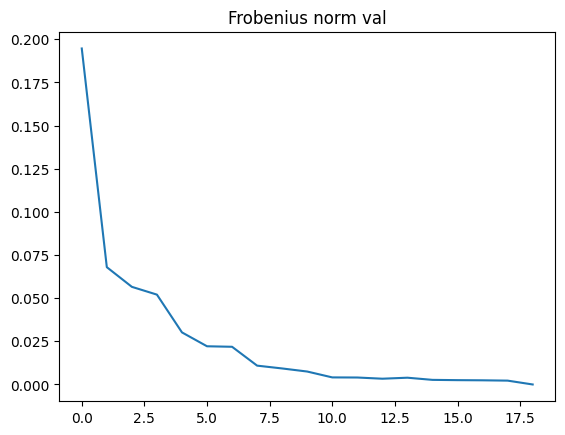

In [ ]:
plt.plot(frobenius_norm_valores)
plt.ylabel('')
plt.title('Frobenius norm val')
plt.show()

# Ejercicio 2


Con el mismo $k$ implementa K-MEDOIDS. Usalo para el mismo dataset (datablow.csv)

a. Comprueba que los centroides pertenecen al dataset


In [ ]:
import numpy as np
from collections import  Counter
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

class k_medoids:
    def __init__(self, k = 2, max_iterations = 300, has_converged = False):

        self.k = k
        self.medoids = []
        self.max_iterations = max_iterations
        self.has_converged = has_converged
        self.medoids_cost = []
        self.clusters = []
        self.currentLabels = []


    def initMedoids(self, points):
      self.medoids = []
      # Se toman k puntos aleatorios del dataset, como medioides iniciales
      indexes = np.random.randint(0, len(points)-1, self.k)

      self.medoids = points[indexes]
      # A cada uno de estos medoides iniciales se les asigna un valor de costo
      # (suma de las distancias a los demas puntos) igual a 0
      for i in range(0, len(indexes)):
        self.medoids_cost.append(0)

    def euclideanDistance(self, x, y):

      currSum = 0
      for i in range(len(x)):
          currSum += (x[i] - y[i])**2
      d = np.sqrt(currSum)

      return d


    def isConverged(self, new_medoids):
        return set([tuple(x) for x in self.medoids]) == set([tuple(x) for x in new_medoids])

    def updateMedoids(self, X, labels):

        self.has_converged = True

        # Separamos los puntos de acuerdo al cluster que pertenecen
        self.clusters = []
        for i in range(0,self.k):
            cluster = []
            for j in range(len(X)):
                if (labels[j] == i):
                    cluster.append(X[j])
            self.clusters.append(cluster)

        #Calculamos los nuevos medoides
        new_medoids = []
        for i in range(0, self.k):
            # Ponemos el medoide actual como candidato seleccionado
            selected_medoid = self.medoids[i]
            selected_medoid_cost = self.medoids_cost[i]
            for j in range(len(self.clusters[i])):
                # Calculamos el costo total de los puntos actuales en el cluster,
                # para compararlo con el costo actual
                curr_medoid_cost = 0
                for dpoint_index in range(len(self.clusters[i])):
                    curr_medoid_cost += self.euclideanDistance(self.clusters[i][j], self.clusters[i][dpoint_index])

                # Si el costo actual es menor que el costo optimo actual
                # el punto actual es el nuevo medoide del cluster
                if curr_medoid_cost < selected_medoid_cost:
                    selected_medoid = self.clusters[i][j]
                    selected_medoid_cost = curr_medoid_cost

            # El medoide optimo del cluster actual
            new_medoids.append(selected_medoid)

        # Si no ha convergido aun, aceptamos los nuevos medoides
        if not self.isConverged(new_medoids):
            self.medoids = new_medoids
            self.has_converged = False

    def predict(self,data):

        pred = []
        for i in range(len(data)):
            distances_to_medoids = []
            for j in range(len(self.medoids)):
                distances_to_medoids.append(self.euclideanDistance(self.medoids[j],data[i]))

            pred.append(distances_to_medoids.index(min(distances_to_medoids)))

        return np.array(pred)

    def plot(self, X, label):
      K = np.amax(label) + 1
      X0 = X[label == 0, :]
      X1 = X[label == 1, :]
      X2 = X[label == 2, :]
      X3 = X[label == 3, :]

      plt.figure(dpi=120)

      plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
      plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
      plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
      plt.plot(X3[:, 0], X3[:, 1], 'yo', markersize = 4, alpha = .8)

      plt.axis('equal')
      plt.plot()
      plt.show()

    def fit(self, X):

        self.initMedoids(X)

        for _ in range(self.max_iterations):
            # Las etiquetas (indice del medoide) para cada punto en esta iteracion
            self.currLabels = []
            for medoid in range(0,self.k):
              # Costo del cluster actual(suma de las distancias hacia el medoide)
              self.medoids_cost[medoid] = 0
              for i in range(len(X)):
                  # Distancias desde el punto actual a cada uno de los medoides
                  distancesToMedoid = []
                  for j in range(0, self.k):
                      distancesToMedoid.append(self.euclideanDistance(X[i], self.medoids[j]))
                  # La etiqueta, es el indice del medoide cuya distancia a este punto es la minima entre todos los otros medoides
                  currLabel = distancesToMedoid.index(min(distancesToMedoid))
                  self.currLabels.append(currLabel)
                  # Sumamos al costo de este medoide, la distancia
                  self.medoids_cost[medoid] += min(distancesToMedoid)

              self.updateMedoids(X, self.currLabels)

            if self.has_converged:
                break

        return np.array(self.medoids)

In [ ]:
points  = np.loadtxt('datablow.csv', delimiter=',', skiprows=1, usecols=[1,2])

Grafica el diagrama de Voronoi generado por los centroides

Centroides encontrados por el modelo:
[[0.45246578 0.70656097]
 [0.98320746 0.5247264 ]
 [0.07508407 0.77235245]
 [0.48633345 0.06560132]]


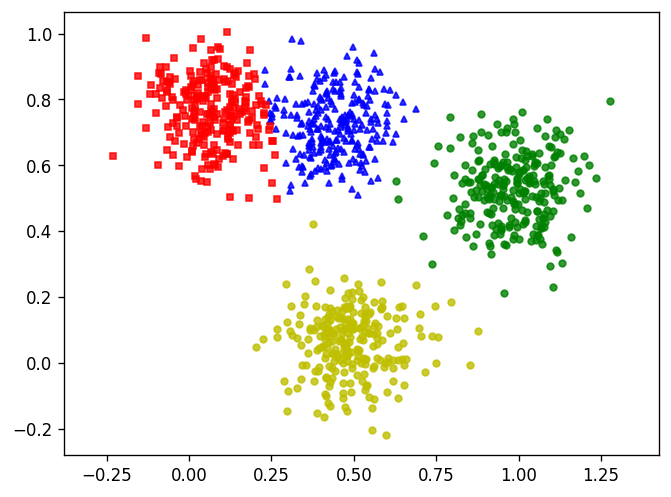

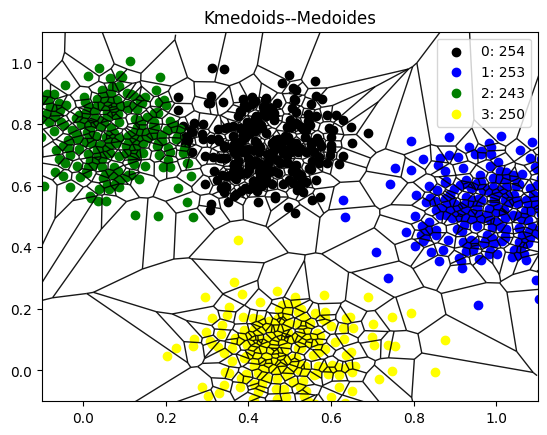

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn_extra.cluster import KMedoids

# Escojemos a k = 4 de acuerdo a la conclusion del ejercicio anterior
k= 4
model=k_medoids(k)
print('Centroides encontrados por el modelo:')
print(model.fit(points))

# Tomamos los puntos que seran los centroides
medoids = model.fit(points)

pred = model.predict(points)

model.plot(points,pred)

# Crear el diagrama de Voronoi
vor = Voronoi(points)
# Graficar el diagrama de Voronoi
fig = voronoi_plot_2d(vor,show_vertices=False,
                        line_width=1, line_alpha=.9, point_size=0)


colors = ['black', 'blue', 'green', 'yellow']
for curr_cluster_index in range(0,k):
  x = []
  y = []
  num_of_points_in_curr_cluster = 0
  for point, predicted_cluster_index in zip(points, pred):
    if predicted_cluster_index == curr_cluster_index:
      x.append(point[0])
      y.append(point[1])
      num_of_points_in_curr_cluster+= 1
  plt.scatter(x, y, c=colors[curr_cluster_index % len(colors)], label=f'{curr_cluster_index}: {num_of_points_in_curr_cluster}' )

#Titulo
plt.title(f'Kmedoids--Medoides')
plt.legend()
#Limites a mostrar en la imagen
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
fig.dpi=100
plt.show()

# Ejercicio 3

Usando el archivo MNIST


In [ ]:
!wget http://merino.codes/mnist_train_small.csv

--2023-05-04 00:56:59--  http://merino.codes/mnist_train_small.csv
Resolving merino.codes (merino.codes)... 20.213.161.121
Connecting to merino.codes (merino.codes)|20.213.161.121|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36523880 (35M) [application/octet-stream]
Saving to: ‘mnist_train_small.csv’

mnist_train_small.c 100%[===================>]  34.83M  12.9MB/s    in 2.7s    

2023-05-04 00:57:02 (12.9 MB/s) - ‘mnist_train_small.csv’ saved [36523880/36523880]



a. Realiza una reducción dimensional a dos componentes principales. De todo el conjunto de datos.

In [ ]:
from sklearn.decomposition import PCA

def reduccion_dim(path):
    data = np.genfromtxt(path, dtype=float,
                         encoding=None, delimiter=",")
    np.random.shuffle(data)
    # Separamos etiquetas de datos
    X,Y =  data[:,1:], data[:,:1]
    # Reducimos a dos componentes principales mediante PCA
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)
    return(X,Y)

X_test,Y_test = reduccion_dim('mnist_train_small.csv')

b. Separa los datos a cuyas etiquetas correspondan 0 y 1. De tal forma que a cada etiqueta correspondan 50 muestras. Para crear un conjunto de entrenamiento (100 muestras)

In [ ]:
def muestra(n,X,Y):
    m = np.shape(X)[1]
    X_muestra = np.zeros((n,m))
    Y_muestra = np.zeros(n)

    i, i_0, i_1 = 0, 0, 0
    # Tomamos 50 datos con etiqueta 0 y 50 datos con etiqueta 1
    for j in range(np.shape(X)[0]):
        if Y[j] == 0 and i_0 < 50:
            X_muestra[i] = X[j]
            Y_muestra[i] = Y[j]
            if i_0 + i_1 == n:
                break
            i_0 = i_0 + 1
            i = i + 1
        elif Y[j] == 1 and i_1 < 50:
            X_muestra[i] = X[j]
            Y_muestra[i] = Y[j]
            if i_0 + i_1 == n:
                break
            i_1 = i_1 + 1
            i = i + 1
    return(X_muestra,Y_muestra)

X_train, Y_train = muestra(100,X_test,Y_test)

c. Grafica la malla de clasificación y los puntos de los datos completos de ambas etiquetas. Usando K-NN

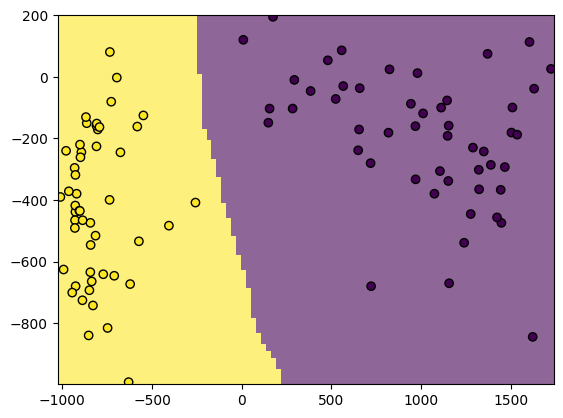

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
# Hacemos fit a modelo K-NN con los datos de entrenamiento obtenidos
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_train)
# Graficamos malla de clasificación de modelo entrenado y puntos de datos
disp = DecisionBoundaryDisplay.from_estimator(knn, X_train, response_method="predict", plot_method="pcolormesh", alpha = 0.6)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolor="k")
plt.show()

d. Usando sklearn.metrics.classification_report() crea un informe que muestre las principales métricas de clasificación (precission, recall, etc.). Usando como X_test los datos completos del conjunto de datos y como X_train el conjunto de datos con las 100 muestras

In [ ]:
from sklearn.metrics import classification_report

# Predicción de etiquetas de datos X_test, con modelo entrenado en X_train
Y_predict = knn.predict(X_test)
print(classification_report(Y_predict, Y_test, zero_division = 0))

              precision    recall  f1-score   support

         0.0       0.99      0.16      0.28     11860
         1.0       1.00      0.27      0.43      8140
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0

    accuracy                           0.21     20000
   macro avg       0.20      0.04      0.07     20000
weighted avg       1.00      0.21      0.34     20000



e. Discutan en equipo y den una conclusión de lo que se observa en los datos ¿Qué puedes decir acerca de las muestras si se usaran 10 muestras por clase? ¿Son muchas o pocas?

Los resultados indican que el clasificador KNN esta completamente y únicamente sobreajustado a las etiquetas 0 y 1, de manera que intenta clasificar todos los demás datos con estas etiquetas y solo obtiene una buena precisión con ellas. Esto tiene sentido, ya que el conjunto de entrenamiento usado solo incluye estas etiquetas.


Si usáramos 10 muestras por clase se obtendría una menor precisión por cada una de las clases, pero tendríamos más categorías disponibles para clasificar y por lo tanto la exactitud general mejoraría.